# Final Dataset Report
#####    Arne Wittgen, Chris Vajdik

#### The following code block contains general code to set up the data for analysis and other operations in the report, but does not have any relevance beyond this purpose.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy

sns.set_style("whitegrid")

itm_data = pd.read_csv('itm_songs_database_preprocessed.csv')

formula_str = "popularity_abs ~ complexity"
model_abs = sm.formula.ols(formula=formula_str, data=itm_data)
model_abs_fitted = model_abs.fit()

intercept = model_abs_fitted.params[0]
comp_slope = model_abs_fitted.params[1]
pred_scores = intercept + comp_slope * itm_data['complexity']

residual_scores = itm_data['complexity'] - (intercept + comp_slope * itm_data['complexity'])
#this print statement only exists to prevent output from this code block
print()

### Abstract

[The abstract will be here in the final version]

### Introduction

[There will be more text for the introduction here in the final version, especially to introduce the general idea relevance of our report]

Our dataset analysis is conducted under the research question "Which relationship, if any, do the musical characteristics of a song have with its popularity?"
Therefore, our first main aim is to find out which musical characteristics affect the popularity of a specific artist’s song.  We will not consider lyrical characteristics.  Our second main aim is to which combination of characteristics should a new song from this particular artist have in order to be as popular amongst their listeners as possible.  We consider relative popularity on the scale of the artist’s least popular to their most popular song, as this allow us to focus our attention to purely music characteristics rather than on general trends.  We will test our models both with absolute values of popularity and normalized values of popularity to see whether there is a difference. \
Our general hypothesis is that there exist at least two musical characteristics that correlate strongly with the song’s popularity and whose relation to the popularity is linear in nature. For every characteristic that we have obtained, we aim to answer whether or not it correlates with popularity and if so, how strong and of which type is this relation. \
This should give us a general overview of how important a characteristic is and allow us to propose multiple regression models to fit and test using k-fold cross-validation. The performance of specific models will give us insight into which combination of characteristics impacts the popularity most significantly which will in turn provide us the answer to what characteristics should a future song have to be as popular as possible. \
We chose the artist In This Moment since we both listen to them and therefore, we know that their music is varied enough to create an interesting data set.  This was a concern because many artists produce tracks which are very similar to each other in their characteristics, and therefore in such cases we can predict that a popular song by the artist will be a song most similar to the songs they have already produced, ergo there would be little reasons to build a regression model.

[Hypotheses]

### Data

We used the Spotify Developer API (https://developer.spotify.com/) to obtain information about songs by a single artist.  We decided to predict popular songs for one artist only because this allows to analyze the whole population without having to consider computational limitations, and reduces the amount of possibly relevant variables to a reasonable amount. For example, the general popularity of a song is greatly influenced by its genre and there are thousands of music genres, so obtaining enough samples would be a task for days if not weeks. \
We used the Spotipy library (https://spotipy.readthedocs.io/en/2.12.0/) to obtain the data we were interested in, using a custom Python3 script. These include all studio songs by “In This Moment” along with their popularity as calculated by Spotify’s popularity algorithm, their name and Spotify id, track number, duration, whether or not are they explicit, musical attributes (key, mode, time signature, valence and tempo) and their ratings on acousticness, danceability, energy, instrumentalness, loudness and speechiness.  These are provided by Spotify as well.\
Generally, the musical attributes key, time_signature and tempo are measured as integers representing the musical notation (if not already counted numerically), the binary attributes mode and whether or not a song is explicit are coded with 0 and 1, while the other variables are measured on a normalized scale from 0 to 1; More in-depth information on the measurements can be found in the documentation (https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/).


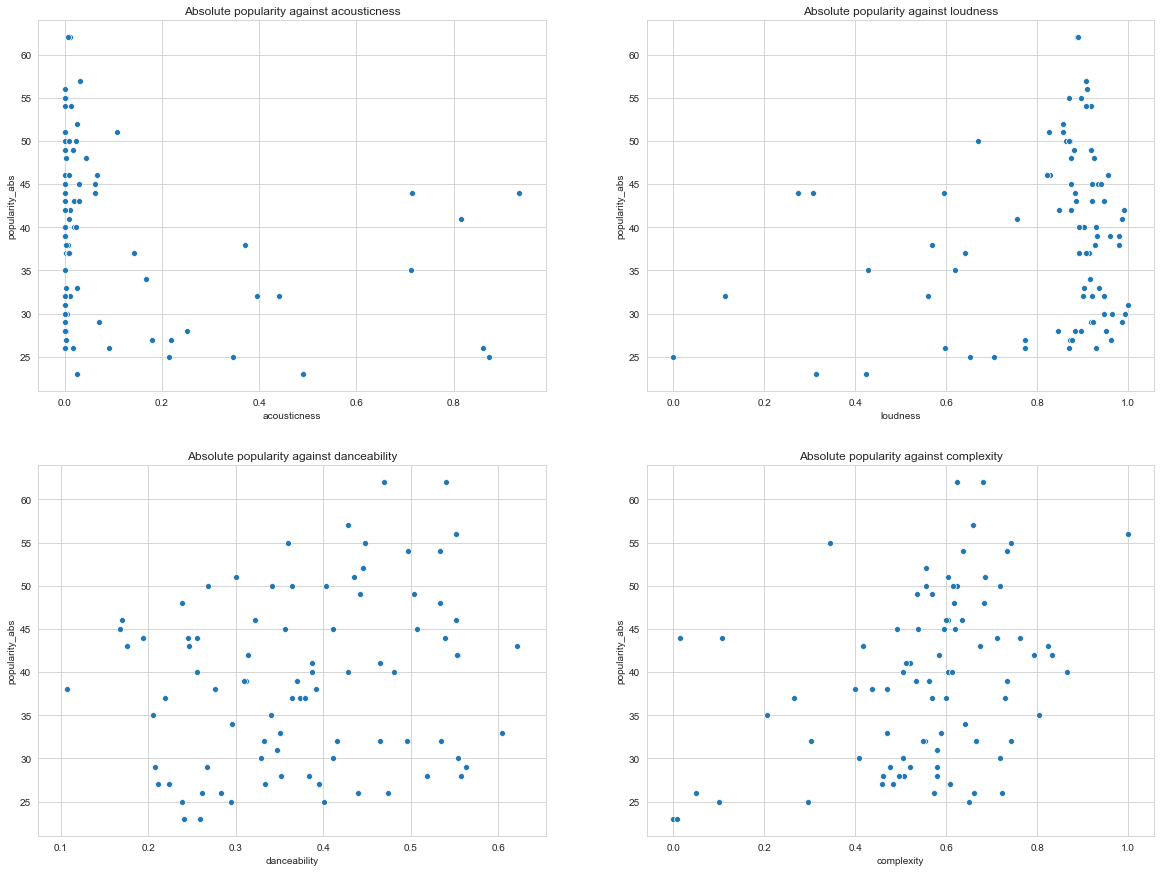

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(20,15))

sns.scatterplot(x = itm_data['acousticness'], y = itm_data ['popularity_abs'], ax = axs[0,0]).set(
    title = 'Absolute popularity against acousticness')

sns.scatterplot(x = itm_data['loudness'], y = itm_data ['popularity_abs'], ax = axs[0,1]).set(
    title = 'Absolute popularity against loudness')

sns.scatterplot(x = itm_data['danceability'], y = itm_data ['popularity_abs'], ax = axs[1,0]).set(
    title = 'Absolute popularity against danceability')

sns.scatterplot(x = itm_data['complexity'], y = itm_data ['popularity_abs'], ax = axs[1,1]).set(
    title = 'Absolute popularity against complexity')

plt.show()

It should be noted that all variables were analyzed, but only the graphs displaying relevant insights are shown above.\
There are multiple interesting observations here:
* while a majority of songs build a cloud at an acousticness of zero, due to having an acousticness of zero or near zero, about 20% of the population build a very loose cloud ranging up to near 1 for acousticness, which seems to have a moderate positive linear relationship.
* for loudness, a similar behaviour can be observed: The majority of songs builds a cloud at a loudness of near 1 which has a high spread in popularity, the leftover songs with a lower loudness seem to have a weak positive linear relationship.
* the variable danceability seems to have a weak to moderate positive linear relationship with popularity. While the spread of data is very high, it is notable that there are no prominent outliers, and the trend seems to be consistent throughout the data.
* For complexity, most of the entries are centered around the value of 0.6. The relationship to popularity here seems to be, again weak to moderate, positive and either linear or a second order polynomial.

[I know that there should probably be more for the univariate analysis, but I don't know exactly what would be reasonable to analyze here]

### Results

When perform either backward- or forward-selection on this dataset, both approaches end up with the same model, namely one where the only statistically signifcant variable is complexity:

In [12]:
print(model_abs_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         popularity_abs   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     12.92
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           0.000546
Time:                        16:53:09   Log-Likelihood:                -312.11
No. Observations:                  86   AIC:                             628.2
Df Residuals:                      84   BIC:                             633.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.6721      3.046      9.412      0.0

Taking a closer look at the model summary shows the following:
* while there are no other statistically significant variables, complexity has a high statistical significance at $p = 0.001$.\
[there should definitely be more about the model itself here]

While this seems to be the definitive linear model when applying backwards or forward selection, there are interesting observations to be made when creating a linear model for each explanatory variable separately:

In [15]:
to_plot = ['key', 'mode', 'time_signature', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness',
           'speechiness',
           'valence', 'tempo', 'explicit', 'complexity']
for key in to_plot:
    formula_str = "popularity_abs ~ " + key
    model = sm.formula.ols(formula=formula_str, data=itm_data)
    model_fitted = model.fit()
    print("p-value of " + key + ": ", model_fitted.pvalues[1])

p-value of key:  0.26092217140152213
p-value of mode:  0.9500231068373352
p-value of time_signature:  0.7976705452702997
p-value of acousticness:  0.027251764444072048
p-value of danceability:  0.0571372662252934
p-value of energy:  0.1496592461992799
p-value of instrumentalness:  0.11955499169018188
p-value of loudness:  0.042431446385506444
p-value of speechiness:  0.2827318508652077
p-value of valence:  0.0819487049733888
p-value of tempo:  0.8321381839759702
p-value of explicit:  0.07625244404560577
p-value of complexity:  0.0005464238232331873


Looking at the p-values here, we can conclude that on their own, also acousticness and loudness have a statistically significant linear relationship with the popularity of a song, when using a significance level of $a = 0.05$. Were the significance level to be increased to 0.10, danceability, valence and explicitness could also be considered statistically significant. Now, when adding any of these variables to a multiple regression model together with complexity, the p-values far exeed the significance level, as shown at the example of a model with the explanatory variables complexity, acousticness and loudness:

In [16]:
formula_str2 = "popularity_abs ~ complexity + acousticness + loudness"
model_abs2 = sm.formula.ols(formula=formula_str2, data=itm_data)
model_abs2_fitted = model_abs2.fit()
print(model_abs2_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         popularity_abs   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     5.052
Date:                Fri, 05 Jun 2020   Prob (F-statistic):            0.00292
Time:                        17:04:59   Log-Likelihood:                -310.97
No. Observations:                  86   AIC:                             629.9
Df Residuals:                      82   BIC:                             639.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       33.7214      5.657      5.961   

As it can be seen, both acousticness and loudness exceed even a significance level of 0.10, at $p = 0.143$ and $p = 485$ respectively. Therefore, the statistical significance of acousticness and loudness does not keep up in a multivariate model.

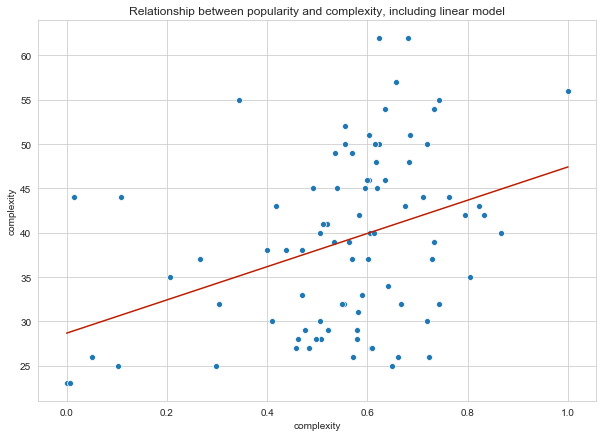

In [21]:
plt.figure(figsize = (10,7))
sns.scatterplot(x = itm_data['complexity'], y= itm_data['popularity_abs']).set(title = 'Relationship between popularity and complexity, including linear model')
sns.lineplot(x = itm_data['complexity'], y = pred_scores, color = '#bd1d00')
plt.show()

Analyzing the plot of the previously presented linear model containing just complexity as explanatory variable, it can be seen that there are quite a few influential outliers with high leverage. While the main cloud centered around a complexity of 0.6 suggests a steep slope, the linear model shows a much more gradual incline.
[I am very unsure if this is good/correct reasoning]

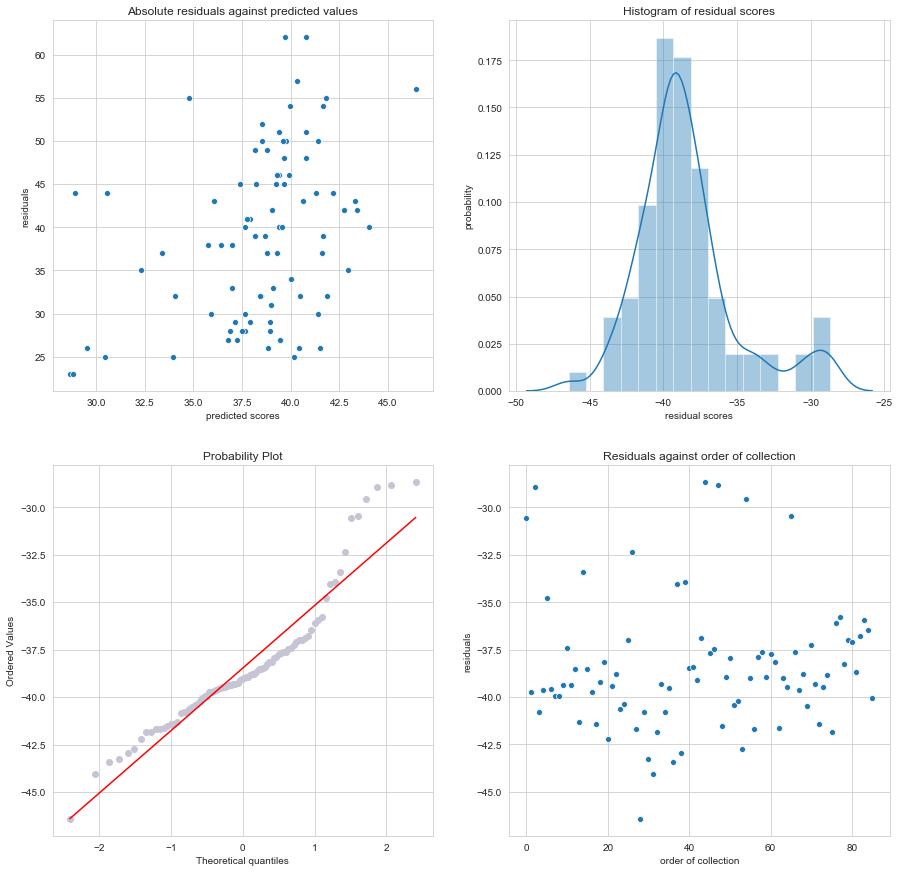

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))

#scatterplot of residuals against predicted scores
sns.scatterplot(x = np.abs(residual_scores), y= itm_data['popularity_abs'], ax = axs[0,0]).set(
    title = 'Absolute residuals against predicted values', 
    xlabel = 'predicted scores', ylabel = 'residuals')

#Histogram of the residuals
sns.distplot(residual_scores, bins = 15, ax = axs[0, 1]).set(
    title = 'Histogram of residual scores', 
    xlabel = 'residual scores', ylabel = 'probability')

# Probability/QQ plot
scipy.stats.probplot(residual_scores, plot = axs[1, 0])
axs[1, 0].get_lines()[0].set_markerfacecolor('#c5c5d6')
axs[1, 0].get_lines()[0].set_markeredgecolor('#c5c5d6')

#Scatterplot of residuals against order of collection
sns.scatterplot(x = list(range(0, len(itm_data['popularity_abs']))), y = residual_scores, ax = axs[1,1]).set(
    title = 'Residuals against order of collection', 
    xlabel = 'order of collection', ylabel = 'residuals')

plt.show()

### Conclusion

text